In [1]:
import datetime
import pandas_datareader.data as web
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
tickers="REAINTRATREARAT10Y"
start=datetime.datetime(1930,1,1)
real_interest=web.DataReader(tickers,'fred', start)
cpi=web.DataReader("CPIAUCSL",'fred', start)


In [2]:
control=pd.merge(real_interest, cpi, left_index=True, right_index=True).dropna()

file_path = 'Prices (1).xlsx'

# Name of the sheet to read
sheet_name = 'Daily'

# Read the Excel file for the specific sheet
price = pd.read_excel(file_path, sheet_name=sheet_name)
price.set_index("Date", inplace=True)
modelo=pd.merge(control, price, left_index=True, right_index=True).dropna()

print(modelo)

modelo["log CPIAUCSL"]=modelo['CPIAUCSL'].apply(lambda x:math.log(x,  2.71828))
modelo["log Price"]=modelo['Price'].apply(lambda x:math.log(x,  2.71828))
print(modelo)
# Define the input features (X) and the target variable (y)
X = modelo[['REAINTRATREARAT10Y', "log CPIAUCSL"]]
y = modelo["log Price"]

            REAINTRATREARAT10Y  CPIAUCSL    Price
1982-01-01            7.623742    94.400   397.50
1982-02-01            7.656648    94.700   379.50
1982-03-01            7.128993    94.700   361.25
1982-04-01            7.408347    95.000   327.00
1982-06-01            7.345379    97.000   318.75
...                        ...       ...      ...
2023-09-01            1.699708   307.288  1940.55
2023-11-01            2.094329   308.024  1986.35
2023-12-01            1.680899   308.742  2045.40
2024-01-01            1.680871   309.685  2078.40
2024-02-01            1.616823   311.054  2045.85

[363 rows x 3 columns]
            REAINTRATREARAT10Y  CPIAUCSL    Price  log CPIAUCSL  log Price
1982-01-01            7.623742    94.400   397.50      4.547544   5.985199
1982-02-01            7.656648    94.700   379.50      4.550717   5.938859
1982-03-01            7.128993    94.700   361.25      4.550717   5.889574
1982-04-01            7.408347    95.000   327.00      4.553880   5.789964
1

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False
                                                    # random_state=42
                                                    )

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


# Make predictions on the testing data

LinearRegression()

<Axes: >

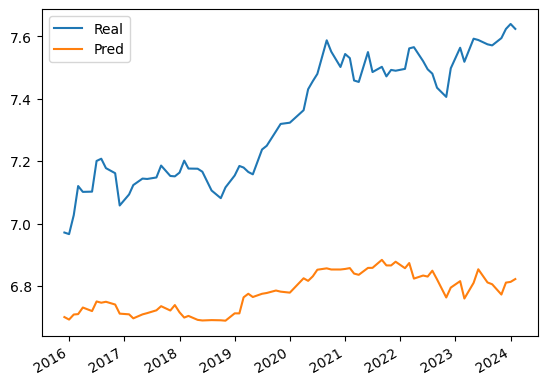

In [4]:
y_pred_train = model.predict(X_test)
graph=pd.DataFrame(
    {"Real":y_test,
     "Pred":y_pred_train

    }
)
graph.plot()

In [5]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.32851322254276916
R^2 Score: -7.563283174801784
